In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import tensorflow as tf
from matplotlib import cm
import keras
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from keras import layers, models
from keras.layers import Dense
from keras.optimizers import Adam
# Datasets
from sklearn.datasets import load_iris

Using TensorFlow backend.


In [2]:
iris = load_iris()
data = iris.data
target = iris.target
cmap = cm.get_cmap('brg')
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'label'
df = pd.DataFrame(iris.data, columns=features)
df[label] = target
print(df[features].shape, df[label].shape)



(150, 4) (150,)


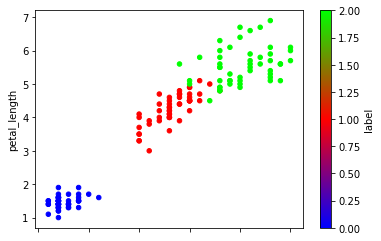

In [3]:
df.plot('petal_width', 'petal_length', cmap=cmap, c='label', kind='scatter')

# Perception with Sklearn

In [4]:
per_clf = Perceptron(shuffle=True, max_iter=1000)
per_clf.fit(df[features], df.label)
per_clf.score(df[features], df.label)

0.48

In [5]:
X_train,X_test, y_train,y_test = train_test_split(df[features],df[label],test_size=0.2,random_state=0)
y_train = pd.get_dummies(y_train).values

# X_train.values

# Perception with Plain Tensorflow

In [6]:
NN = keras.Sequential()
NN.add(Dense(30, input_shape=(4,), activation='relu') )
NN.add(Dense(10,activation='relu'))
NN.add(Dense(5,activation='relu'))
NN.add(Dense(3,activation='softmax'))

NN.compile(Adam(lr=0.04),'categorical_crossentropy', ['accuracy'])
NN.summary()

W0917 15:59:12.993880 140165305648960 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 15:59:13.032484 140165305648960 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 15:59:13.036581 140165305648960 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 15:59:13.125727 140165305648960 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [7]:
NN.fit(X_train.values, y_train, epochs=10)

W0917 15:59:13.272619 140165305648960 deprecation.py:323] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0917 15:59:13.418213 140165305648960 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
120/120 [==============================] - 0s 3ms/step - loss: 1.1454 - acc: 0.4250
Epoch 2/10
120/120 [==============================] - 0s 100us/step - loss: 0.9627 - acc: 0.6917
Epoch 3/10
120/120 [==============================] - 0s 54us/step - loss: 0.8073 - acc: 0.6917
Epoch 4/10
120/120 [==============================] - 0s 79us/step - loss: 0.6841 - acc: 0.6917
Epoch 5/10
120/120 [==============================] - 0s 81us/step - loss: 0.5915 - acc: 0.7417
Epoch 6/10
120/120 [==============================] - 0s 82us/step - loss: 0.5175 - acc: 0.7167
Epoch 7/10
120/120 [==============================] - 0s 141us/step - loss: 0.4511 - acc: 0.8500
Epoch 8/10
120/120 [==============================] - 0s 98us/step - loss: 0.3956 - acc: 0.7583
Epoch 9/10
120/120 [==============================] - 0s 153us/step - loss: 0.3494 - acc: 0.8750
Epoch 10/10
120/120 [==============================] - 0s 158us/step - loss: 0.3179 - acc: 0.8583


In [8]:
a = np.array([[6.4, 3.1, 5.5, 1.8]])
NN.predict(a)

array([[9.3568951e-06, 3.7323844e-01, 6.2675226e-01]], dtype=float32)